# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Dataset

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12296,0,0.000000,0,0.000000,5,108.000000,0.000000,0.040000,0.000000,0.0,Dec,2,2,1,2,New_Visitor,False,False
8855,6,197.250000,0,0.000000,51,3296.940476,0.000000,0.008595,3.507532,0.0,Nov,1,1,1,3,Returning_Visitor,True,False
6793,10,215.244507,2,245.171429,101,3558.576942,0.008636,0.012041,30.872272,0.0,Sep,3,2,1,2,Returning_Visitor,True,True
8458,6,110.625000,1,106.000000,30,1508.521825,0.040000,0.043295,21.017470,0.0,Nov,3,2,3,13,Returning_Visitor,False,False
718,0,0.000000,0,0.000000,4,41.000000,0.050000,0.100000,0.000000,0.0,Mar,3,2,2,1,Returning_Visitor,False,False


# Data Cleaning <br>

## a) Missing values

In [4]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Tidak ada feature yang memiliki data hilang.

## b) Duplicated data

In [5]:
print(f'Jumlah row duplicated sebelum dihapus: {df.duplicated().sum()}')

# drop duplicated rows
df.drop_duplicates(inplace=True)   # keep = 'First'
print(f'Jumlah row duplicated SETELAH dihapus: {df.duplicated().sum()}')

Jumlah row duplicated sebelum dihapus: 125
Jumlah row duplicated SETELAH dihapus: 0


In [6]:
# persentase data duplicate yang di drop

print(f'Jumlah row dataset setelah drop row duplicated: {len(df)}')
print(f'Persentase drop data duplicate: {round(((len(raw)-len(df))/len(raw))*100, 2)}%')


Jumlah row dataset setelah drop row duplicated: 12205


NameError: name 'raw' is not defined

* Dataset memiliki 125 row duplicated (1.01% data asli).
* Menghindari redundan info, dilakukan drop duplicates, sehingga total row pada dataset: 12205

## c) Handling outliers

In [7]:
# pengelompokkan berdasarkan jenisnya
numericals   = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
                'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categoricals = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
timestamps   = ['Month']

In [8]:
### outlier check

# IQR function 
def IQR(x):
  q1 = np.percentile(x, 25)
  q3 = np.percentile(x, 75)
  
  bb = q1 - 1.5*(q3 - q1)
  ba = q3 + 1.5*(q3 - q1)

  outlier_indices = list(x.index[(x < bb) | (x > ba)])
  outlier_values = list(x[outlier_indices])

  return len(outlier_indices)

# IQR Method
for i in numericals:
  print(f'Jumlah outlier IQR {i}: {IQR(df[i])}')

Jumlah outlier IQR Administrative: 404
Jumlah outlier IQR Administrative_Duration: 1149
Jumlah outlier IQR Informational: 2631
Jumlah outlier IQR Informational_Duration: 2405
Jumlah outlier IQR ProductRelated: 1007
Jumlah outlier IQR ProductRelated_Duration: 951
Jumlah outlier IQR BounceRates: 1428
Jumlah outlier IQR ExitRates: 1325
Jumlah outlier IQR PageValues: 2730
Jumlah outlier IQR SpecialDay: 1249


Seluruh feature numerical memiliki outlier dengan jumlah yang cukup besar dengan 3 feature terbesar: PageValues (2730), Informational (2631), dan Informational_Duration (2405).

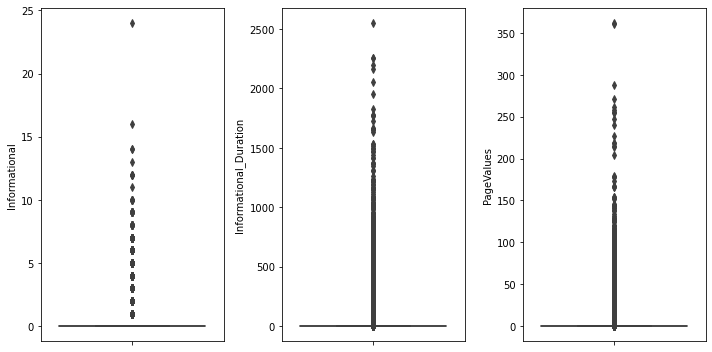

In [9]:
# cek boxplot
rcParams['figure.figsize'] = 10, 5

nodist = ['Informational', 'Informational_Duration', 'PageValues']
for i in range (0, len (nodist)):
    plt.subplot (1, 3, i+1)
    sns.boxplot (y = df[nodist[i]], orient = 'v')
    plt.tight_layout()

Data berkumpul cukup banyak pada nilai nol, tidak terlihat distribusi dari masing-masing feature.

### Log Transformation <br>

In [10]:
df[nodist].skew()

Informational             4.014173
Informational_Duration    7.540291
PageValues                6.350983
dtype: float64

Nilai skew ketiga feature tersebut positif. Dapat ditinjau log transformationnya.

C:\Users\angel\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\angel\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


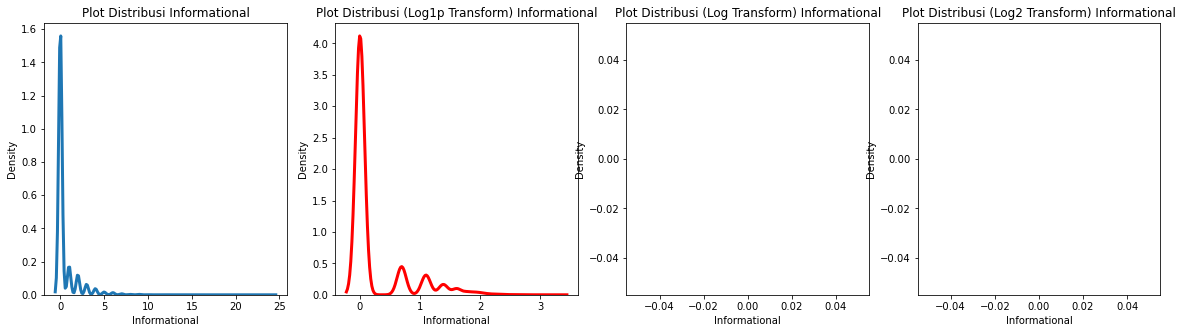

C:\Users\angel\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\angel\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x360 with 0 Axes>

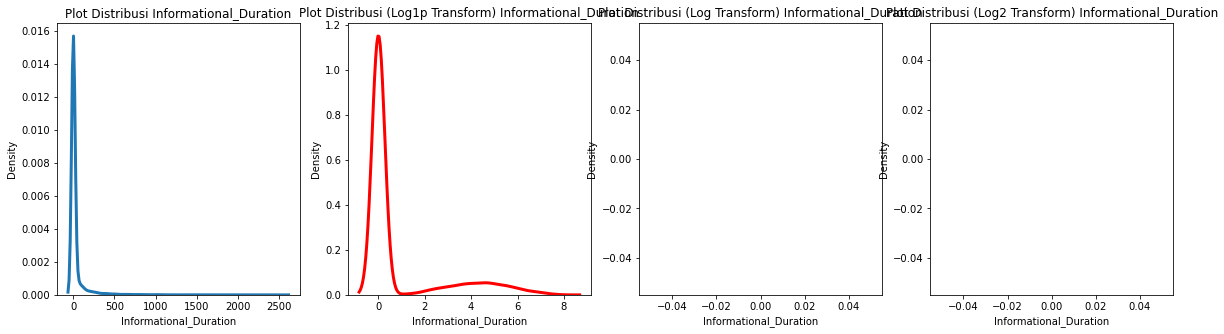

C:\Users\angel\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\angel\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x360 with 0 Axes>

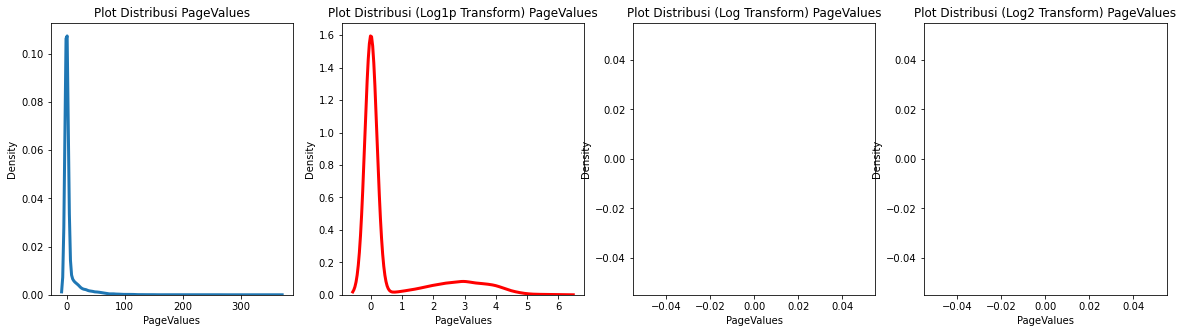

<Figure size 1440x360 with 0 Axes>

In [11]:
# displot untuk feature numericals

rcParams['figure.figsize'] = 20, 5
for i in range (0, len (nodist)):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    sns.kdeplot(x = df[nodist[i]], ax = ax1, linewidth = 3).set(title = f'Plot Distribusi {nodist[i]}')
    sns.kdeplot(np.log1p(df[nodist[i]]), ax = ax2, color = 'red', linewidth = 3).set(title = f'Plot Distribusi (Log1p Transform) {nodist[i]}')
    sns.kdeplot(np.log(df[nodist[i]]), ax = ax3, color = 'red', linewidth = 3).set(title = f'Plot Distribusi (Log Transform) {nodist[i]}')
    sns.kdeplot(np.log2(df[nodist[i]]), ax = ax4, color = 'red', linewidth = 3).set(title = f'Plot Distribusi (Log2 Transform) {nodist[i]}')
    plt.show()
    plt.tight_layout()
    fig.tight_layout(pad = 7)

Hasil Log-Transformation untuk feature Informational_Duration dan PageValues menyerupai normal distribution. Namun transform menggunakan Log dan Log2 tidak berhasil untuk nilai data nol. Dipilih Log1p-Transformation.

In [12]:
# log transformation
df['log_Informational'] = np.log1p(df['Informational'])
df['log_Informational_Duration'] = np.log1p(df['Informational_Duration'])
df['log_PageValues'] = np.log1p(df['PageValues'])

In [13]:
# IQR Method
log = ['log_Informational', 'log_Informational_Duration', 'log_PageValues']
for i in log:
  print(f'Jumlah outlier IQR {i}: {IQR(df[i])}')

Jumlah outlier IQR log_Informational: 2631
Jumlah outlier IQR log_Informational_Duration: 2405
Jumlah outlier IQR log_PageValues: 2730


Jumlah outlier tidak berkurang setelah dilakukan Log1p-Transformation

In [14]:
# library: 
from scipy import stats

z_score = df.copy()

print(f'Jumlah baris sebelum memfilter outlier: {len(z_score)}')

filtered_entries = np.array([True] * len(z_score))  # array kosong dengan nilai awal True
for col in numericals:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
z_score = z_score[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(z_score)}')
print(f'Persentase drop data outliers: {round(((len(df)-len(z_score))/len(df))*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 10020
Persentase drop data outliers: 17.9%


In [15]:
# drop data hasil log transformation
df = df.drop(columns = log).copy()

* Persentase outliers yang didrop (17.9% > 5%) sangat besar.
* Tidak dilakukan drop outliers, sehingga jumlah row tetap 12205.
* Hal tersebut juga didukung oleh informasi pada dataset yang diperoleh melalui google analytics. Pada nilai maksimumnya, nilai tersebut masih memiliki makna. Sebagai contoh pada Informational_Duration mungkin terjadi saat user/pengunjung membuka lalu membiarkan halaman tersebut tetap terbuka pada devicenya. Namun tentu, tidak dapat diketahui pasti status dari outlier yang terdapat pada data.
* Adanya outliers pada data perlu menjadi catatan saat pemodelan. 

## d) Feature encoding

Pada dataset, terdapat:
* 6 categoricals: Month, OperatingSystems, Browser, Region, TrafficType, dan VisitorType
* 2 boolean: Weekend, Revenue

Akan dilakukan:
* Label encoding untuk Revenue dan Weekend (False: 0, True: 1)
* One hot encoding untuk Visitor Type

### Label Encoding (Revenue, Weekend)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [17]:
# library
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# label encoding for Revenue, Weekend (True: 1, False: 0)
df['Revenue'] = LabelEncoder().fit_transform(df['Revenue'])
df['Weekend'] = LabelEncoder().fit_transform(df['Weekend'])


In [18]:
df['Month'].value_counts()

May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64

In [19]:
# label encoding (mapping) for month

# berdasarkan keurutan bulan
mapping_month = {'Jan' : 1, 'Feb' : 2,
                 'Mar' : 3, 'Apr' : 4,
                 'May' : 5, 'June' : 6,
                 'Jul' : 7, 'Aug' : 8,
                 'Sep' : 9, 'Oct' : 10,
                 'Nov' : 11, 'Dec' : 12}

# berdasarkan frekuensi user yang datang pada setiap bulannya. 1: paling sedikit, 12: paling banyak
#mapping_month = {'May' : 12, 'Nov': 11,
#                 'Mar' : 10, 'Dec' : 9,
#                 'Oct' : 8, 'Sep' : 7,
#                 'Aug' : 6, 'Jul' : 5,
#                 'June' : 4, 'Feb' : 3
#                 }

df['Month'] = df['Month'].map(mapping_month)

### One Hot Encoding (VisitorType)

In [20]:
# ubah feature VisitorType ke dalam feature dummies dengan prefix VT
onehot = pd.get_dummies(df['VisitorType'], prefix = 'VT')
df = df.join(onehot)

# drop feature VisitorType
df = df.drop(['VisitorType'], axis = 1)

In [21]:
# menyimpan data hasil processed ke dalam dataset df_processed
df_processed = df.copy()
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

# Feature Engineering

Text(0.5, 1.0, 'Data Correlation')

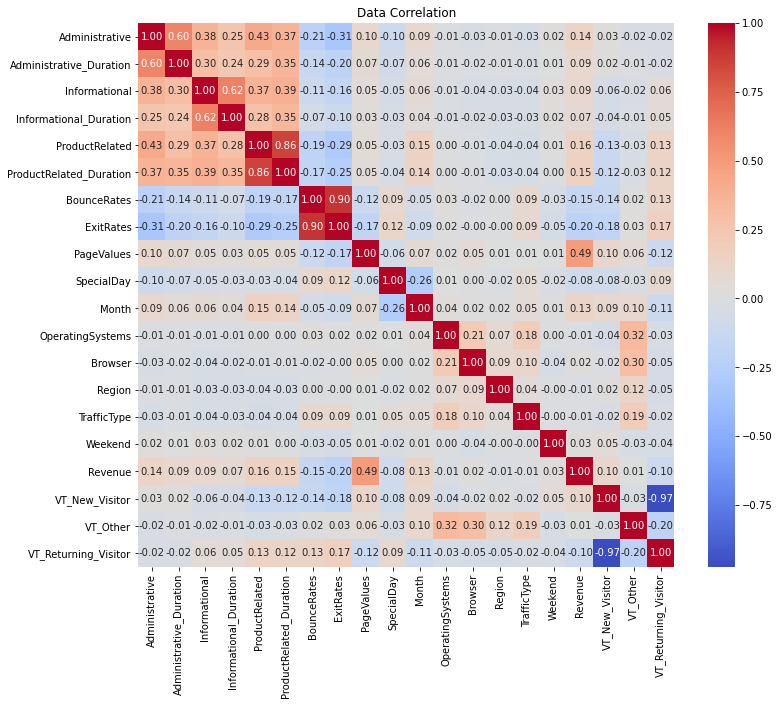

In [22]:
# numeric correlation
plt.figure(figsize=(12 , 10))
sns.heatmap(df_processed.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title('Data Correlation')

## a) Feature Selection

Pengunjung yang tidak memberi keterangan pengunjung kembali atau pengunjung baru di drop karena tidak relevan terhadap pembelajaran, terdapat hanya 85 data (kurang dari 0.5%)

In [23]:
df_feature=df_processed[df_processed.VT_Other != 1].copy()
df_feature.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VT_New_Visitor,VT_Other,VT_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,0,1


Fitur yang kurang relevan dengan goal dihapus

In [24]:
df2 = df_feature.drop(['OperatingSystems', 'Browser', 'TrafficType', 'BounceRates', 'VT_Other', 'VT_Returning_Visitor'], axis=1)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,Region,Weekend,Revenue,VT_New_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.10,0.0,0.0,2,1,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,9,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.14,0.0,0.0,2,2,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.05,0.0,0.0,2,1,1,0,0


Keterangan: OS, Browser, Traffic (berhubungan dengan performance user, bukan terhadap kelakuan konsumen), VT_Others (data tidak mengandung makna), BounceRates (korelasi tinggi dengan ExitRates dan di feature engineering beberapa data di transformasi lebih cocok ke ExitRates), VT_Returning_Visitors (Datanya sama dengan new visitors)

## b) Feature Transformation

Transformasi tiga set data yang memiliki korelasi tinggi menjadi tiga data saja

In [25]:
df2['ATP_Administrative'] = df2['Administrative_Duration']/df2['Administrative']
df2['ATP_Informational'] = df2['Informational_Duration']/df2['Informational']
df2['ATP_ProductRelated'] = df2['ProductRelated_Duration']/df2['ProductRelated']

In [26]:
df2.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,Region,Weekend,Revenue,VT_New_Visitor,ATP_Administrative,ATP_Informational,ATP_ProductRelated
5442,0,0.0,0,0.0,18,103.833333,0.055556,0.000000,0.0,5,3,0,0,0,NaN,NaN,5.768519
8023,1,0.0,0,0.0,15,541.062500,0.093810,0.000000,0.0,12,5,0,0,0,0.0,NaN,36.070833
127,0,0.0,0,0.0,10,225.466667,0.050000,0.000000,0.4,2,8,0,0,0,NaN,NaN,22.546667
10062,0,0.0,0,0.0,21,864.458333,0.010317,0.000000,0.0,12,1,0,0,1,NaN,NaN,41.164683
7099,0,0.0,0,0.0,62,1875.103333,0.027869,12.713679,0.0,9,1,0,0,0,NaN,NaN,30.243602


In [27]:
df_3= df2.drop(['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], axis=1)

Untuk hasil pembagian yang bernilai NULL di isi dengan angka 0

In [28]:
df_3['ATP_Administrative'] = df_3['ATP_Administrative'].fillna(0)
df_3['ATP_Informational'] = df_3['ATP_Informational'].fillna(0)
df_3['ATP_ProductRelated'] = df_3['ATP_ProductRelated'].fillna(0)

In [29]:
df_3.head()

,ExitRates,PageValues,SpecialDay,Month,Region,Weekend,Revenue,VT_New_Visitor,ATP_Administrative,ATP_Informational,ATP_ProductRelated
0,0.20,0.0,0.0,2,1,0,0,0,0.0,0.0,0.000000
1,0.10,0.0,0.0,2,1,0,0,0,0.0,0.0,32.000000
2,0.20,0.0,0.0,2,9,0,0,0,0.0,0.0,0.000000
3,0.14,0.0,0.0,2,2,0,0,0,0.0,0.0,1.333333
4,0.05,0.0,0.0,2,1,1,0,0,0.0,0.0,62.750000


In [30]:
# menyimpan dataset hasil feature engineering ke dalam dataset data
data = df_3.copy()

## Feature Tambahan

Additional Feature: membership duration, favourite category, item bought per month, item bought in price per month

# Machine Learning Evaluation & Supervised Learning

## a) Split data

In [31]:
# cek dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12124 entries, 0 to 12329
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ExitRates           12124 non-null  float64
 1   PageValues          12124 non-null  float64
 2   SpecialDay          12124 non-null  float64
 3   Month               12124 non-null  int64  
 4   Region              12124 non-null  int64  
 5   Weekend             12124 non-null  int64  
 6   Revenue             12124 non-null  int64  
 7   VT_New_Visitor      12124 non-null  uint8  
 8   ATP_Administrative  12124 non-null  float64
 9   ATP_Informational   12124 non-null  float64
 10  ATP_ProductRelated  12124 non-null  float64
dtypes: float64(6), int64(4), uint8(1)
memory usage: 1.0 MB


In [32]:
X = data.drop(['Revenue'], axis = 1) # features
y = data['Revenue'] # target

from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42)

Scaler transformation

In [33]:
# scaler transformation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# data train (X_train)
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_train = pd.DataFrame(X_train, columns = list(X.columns))

# data test (X_test)
X_test = scaler.transform(X_test_raw)
X_test = pd.DataFrame(X_test, columns = list(X.columns))

In [34]:
# cek persentase nilai target
y_train.value_counts(normalize = True)*100

0    84.409616
1    15.590384
Name: Revenue, dtype: float64

Note: target revenue memiliki kelas yang tidak seimbang atau imbalance.

In [35]:
# handling imbalance target (X_train, y_train)

from imblearn import over_sampling

X_over_smote, y_over_smote = over_sampling.SMOTE(sampling_strategy = 0.5).fit_resample(X_train, y_train)
print('AFTER oversampling (smote)')
print(pd.Series(y_over_smote).value_counts())

AFTER oversampling (smote)
0    7163
1    3581
Name: Revenue, dtype: int64


## b) Function

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_validate

# evaluate model
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    #print (y_test.shape)
    #print(y_pred_proba_train.shape)
    
    print("Accuracy Score(Test set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision Score (Test set):%.2f" % precision_score(y_test, y_pred))
    print("Recall Score (Test set):%.2f" % recall_score(y_test, y_pred))
    print("F1 Score (Test set):%.2f" % f1_score(y_test, y_pred))

    print("ROC AUC Score (Test-proba): %.2f" % roc_auc_score (y_test, y_pred_proba[:,1]))
    print("ROC AUC Score (Train-proba): %.2f" % roc_auc_score (y_train, y_pred_proba_train[:,1]))

    #score = cross_validate(model, X, y, cv = 5, scoring = 'roc_auc', return_train_score = True)
    #print('roc_auc (crossval test): '+ str(score['test_score'].mean()))
    #print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    
# feature importance
def show_feature_importance(model):   
    feat_importances = pd.Series(model.feature_importances_,index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh',figsize=(28, 5))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(f'{model}')

# hyperparameter
def show_best_hyperparameter(model):   
    print(model.best_estimator_.get_params())

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# learning curves
def draw_learning_curves(param_values):   
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='12',C=c)
        model.fit(X_train,y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train,y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test,y_pred_proba[:,1])
        test_scores.append(test_auc)

        print ('param value:' +str(c)+';train:'+str(train_auc)+';test:' + str(test_auc))

    plt.plot(param_values,train_scores, label='Train')
    plt.plot(param_values,train_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()  

## c) Model & Evaluation

### K-Nearest Neighbor (KNN) dan Hyperparameter Tunning

In [39]:
# data train (standardization)
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier(n_neighbors=99) # inisiasi object dengan nama knn
knn.fit(X_train,y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy Score(Test set): 0.88
Precision Score (Test set):0.75
Recall Score (Test set):0.33
F1 Score (Test set):0.46
ROC AUC Score (Test-proba): 0.87
ROC AUC Score (Train-proba): 0.88


In [40]:
# data train oversampling with smote(0.5)
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier(n_neighbors=99) # inisiasi object dengan nama knn
knn.fit(X_over_smote,y_over_smote) # fit model KNN dari data train
eval_classification(knn)

Accuracy Score(Test set): 0.87
Precision Score (Test set):0.60
Recall Score (Test set):0.54
F1 Score (Test set):0.57
ROC AUC Score (Test-proba): 0.87
ROC AUC Score (Train-proba): 0.89


Hyperparameter Turning

In [41]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [99]
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy Score(Test set): 0.87
Precision Score (Test set):0.79
Recall Score (Test set):0.27
F1 Score (Test set):0.40
ROC AUC Score (Test-proba): 0.88
ROC AUC Score (Train-proba): 0.90


In [42]:
print('Best n_neighbors:', rs.best_estimator_.get_params()['n_neighbors'])
print('Best p:', rs.best_estimator_.get_params()['p'])
print('Best algorithm:', rs.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 99
Best p: 1
Best algorithm: ball_tree


param value: 1; train: 0.9996220710506425; test: 0.7116940136669145
param value: 2; train: 0.9781151016567143; test: 0.7647977593269277
param value: 3; train: 0.9645331910045418; test: 0.7931895633012478
param value: 4; train: 0.9560428480573671; test: 0.8086505969038994
param value: 5; train: 0.9492913581583533; test: 0.8189351419976739
param value: 6; train: 0.9438022343129939; test: 0.833597325943831
param value: 7; train: 0.93964981714528; test: 0.8443686253085879
param value: 8; train: 0.9360476472221352; test: 0.8499788977707227
param value: 9; train: 0.9319776959133972; test: 0.851032291278337
param value: 10; train: 0.9293707617534426; test: 0.8521085908692916
param value: 11; train: 0.9265686636700378; test: 0.8543765794460279
param value: 12; train: 0.9234478875391502; test: 0.8545707085023373
param value: 13; train: 0.9216138531668736; test: 0.8566700510404802
param value: 14; train: 0.919759769513464; test: 0.8554379900828112
param value: 15; train: 0.9180754716144915; test

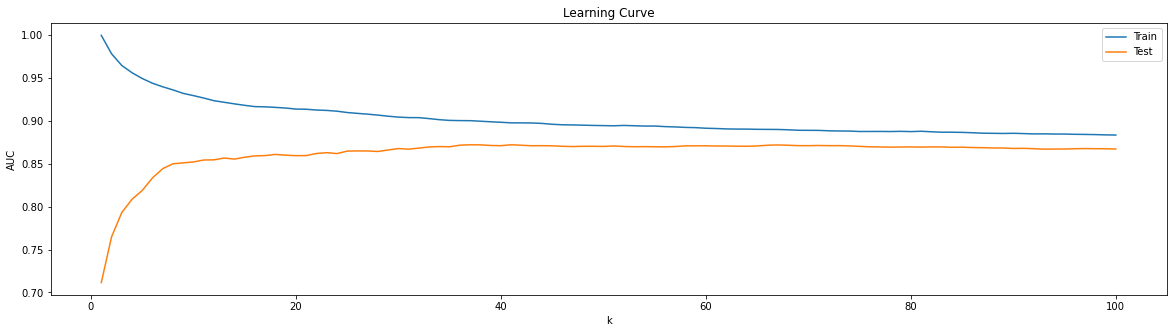

In [43]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# data train (standardization)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy Score(Test set): 0.90
Precision Score (Test set):0.71
Recall Score (Test set):0.57
F1 Score (Test set):0.63
ROC AUC Score (Test-proba): 0.91
ROC AUC Score (Train-proba): 1.00


In [46]:
# data train oversampling with smote(0.5)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_smote, y_over_smote)
eval_classification(rf)

Accuracy Score(Test set): 0.88
Precision Score (Test set):0.62
Recall Score (Test set):0.68
F1 Score (Test set):0.65
ROC AUC Score (Test-proba): 0.91
ROC AUC Score (Train-proba): 1.00


Hyperparameter Tunning

In [47]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 50)]
# Number of criterion to consider at every split
criterion = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 100, num = 50)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2,20,10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(2,20,10)]

hyperparameters = dict(n_estimators=n_estimators,criterion=criterion, max_depth= max_depth,min_samples_split = min_samples_split,min_samples_leaf=min_samples_leaf)
rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf,hyperparameters, scoring='roc_auc',random_state=1,cv=5)
rs.fit(X_over_smote, y_over_smote)
eval_classification(rs)

Accuracy Score(Test set): 0.88
Precision Score (Test set):0.61
Recall Score (Test set):0.71
F1 Score (Test set):0.66
ROC AUC Score (Test-proba): 0.92
ROC AUC Score (Train-proba): 0.98


### AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
# data train (standardization)
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.68
Recall Score (Test set):0.58
F1 Score (Test set):0.63
ROC AUC Score (Test-proba): 0.91
ROC AUC Score (Train-proba): 0.92


In [50]:
# data train oversampling with smote(0.5)
clf = AdaBoostClassifier()
clf.fit(X_over_smote, y_over_smote)
eval_classification(clf)

Accuracy Score(Test set): 0.88
Precision Score (Test set):0.60
Recall Score (Test set):0.68
F1 Score (Test set):0.64
ROC AUC Score (Test-proba): 0.91
ROC AUC Score (Train-proba): 0.92


### XGBoost

In [53]:
from xgboost import XGBClassifier

In [54]:
# data train (standardization)
xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.70
Recall Score (Test set):0.56
F1 Score (Test set):0.62
ROC AUC Score (Test-proba): 0.92
ROC AUC Score (Train-proba): 1.00


In [55]:
# data train oversampling with smote(0.5)
xg = XGBClassifier()
xg.fit(X_over_smote, y_over_smote)
eval_classification(xg)

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.64
Recall Score (Test set):0.65
F1 Score (Test set):0.65
ROC AUC Score (Test-proba): 0.92
ROC AUC Score (Train-proba): 0.99


Hyperparameters tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(5, 8, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 50, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

In [57]:
# Init
xg = XGBClassifier(random_state = 42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv = 5, random_state = 42, scoring = 'roc_auc')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy Score(Test set): 0.90
Precision Score (Test set):0.69
Recall Score (Test set):0.60
F1 Score (Test set):0.64
ROC AUC Score (Test-proba): 0.92
ROC AUC Score (Train-proba): 0.95


### Logistic Regression

In [58]:
#modeling logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 
eval_classification(logreg)

Accuracy Score(Test set): 0.88
Precision Score (Test set):0.76
Recall Score (Test set):0.37
F1 Score (Test set):0.49
ROC AUC Score (Test-proba): 0.88
ROC AUC Score (Train-proba): 0.88


In [59]:
# data train oversampling with smote(0.5)
logreg = LogisticRegression() 
logreg.fit(X_over_smote, y_over_smote) 
eval_classification(logreg)

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.67
Recall Score (Test set):0.55
F1 Score (Test set):0.60
ROC AUC Score (Test-proba): 0.89
ROC AUC Score (Train-proba): 0.89


In [60]:
value1 = logreg.coef_

In [61]:
#tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [0.01]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(X_over_smote, y_over_smote) 
eval_classification(rs)

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.69
Recall Score (Test set):0.53
F1 Score (Test set):0.60
ROC AUC Score (Test-proba): 0.88
ROC AUC Score (Train-proba): 0.89


In [62]:
value2 = rs.best_estimator_.coef_

In [63]:
#learning curve model
from sklearn.linear_model import LogisticRegression

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param value: 0.0001; train: 0.8730747545888848; test: 0.8672145801801678
param value: 0.0003020408163265306; train: 0.8756127825352611; test: 0.8698762670643164
param value: 0.0005040816326530613; train: 0.8774451813082872; test: 0.8719481223024508
param value: 0.000706122448979592; train: 0.878850108303051; test: 0.8735807533925342
param value: 0.0009081632653061226; train: 0.8799132478157627; test: 0.8748497504095896
param value: 0.0011102040816326532; train: 0.8807555286684144; test: 0.8758198230390533
param value: 0.001312244897959184; train: 0.8814078689629636; test: 0.8765768690934518
param value: 0.0015142857142857145; train: 0.8819626009151549; test: 0.8772354189894868
param value: 0.0017163265306122451; train: 0.8824030519648877; test: 0.8777467973000599
param value: 0.0019183673469387757; train: 0.882779028747398; test: 0.8782220985293722
param value: 0.002120408163265306; train: 0.8830882097669758; test: 0.8786011942086549
param value: 0.002322448979591837; train: 0.88336921

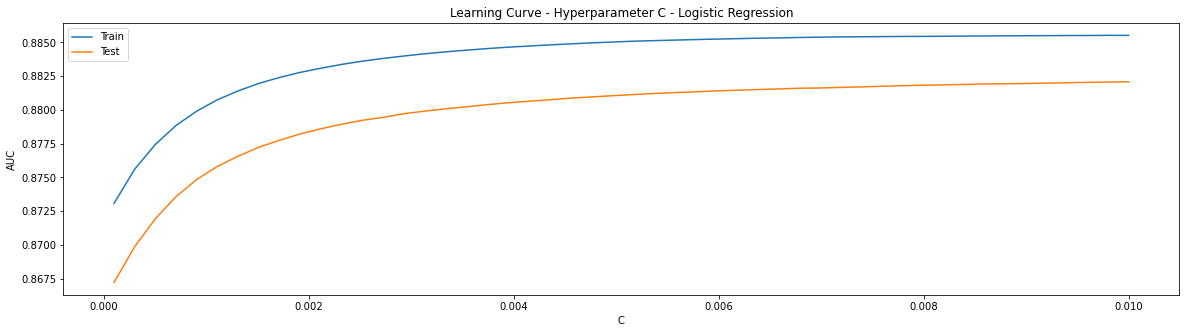

In [64]:
#best C hyperparameter
param_values = [float(x) for x in np.linspace(0.0001, 0.01, 50)]
draw_learning_curve(param_values)

In [65]:
#best hyperparameter
show_best_hyperparameter(rs)

{'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [68]:
#Model coefficient, value 1 = normal model, value 2 =tuned model
names = X.columns
table = {'names': names, 'value1': value1, 'value2': value2}
table

{'names': Index(['ExitRates', 'PageValues', 'SpecialDay', 'Month', 'Region', 'Weekend',
        'VT_New_Visitor', 'ATP_Administrative', 'ATP_Informational',
        'ATP_ProductRelated'],
       dtype='object'),
 'value1': array([[-0.92482837,  1.89592523, -0.17400523,  0.39497203, -0.04617499,
          0.0414115 ,  0.0113297 , -0.00736094,  0.06734932, -0.00790916]]),
 'value2': array([[-7.39015512e-01,  1.55459569e+00, -1.61355547e-01,
          3.43785318e-01, -3.87688372e-02,  3.80759990e-02,
          2.59977526e-02,  1.05437270e-02,  7.10166045e-02,
          1.02797409e-03]])}

Automating cross-validation

In [78]:
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [79]:
over=BorderlineSMOTE(sampling_strategy=0.3, k_neighbors=6)
under=RandomUnderSampler(sampling_strategy=0.4)
model=DecisionTreeClassifier()

steps=[('o',over),('u',under),('model',model)]
pipe=Pipeline(steps=steps)
cv=RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=1)

scores= cross_val_score(pipe, X_train.values, y_train.values.astype('float'), scoring='precision', cv=cv, n_jobs=-1)
print('Mean precision is',np.mean(scores))

Mean precision is 0.5108457245566649


In [80]:
def cv_comparison(models, X, y, cv=RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=42)):
    # Initiate a DataFrame for the averages and a list for all measures
    cv_accuracies = pd.DataFrame()

    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    for model in models:
        steps=[('o',over),('u',under),('model',model)]
        pipe=Pipeline(steps=steps)
        recalls = cross_val_score(pipe, X.values, y.values, scoring='recall', cv=cv)
        recall_score = np.mean(recalls).round(2)
        precisions = cross_val_score(pipe, X.values, y.values, scoring='precision', cv=cv)
        precision_score = np.mean(precisions).round(2)
        accuracies = cross_val_score(pipe, X.values, y.values, scoring='accuracy', cv=cv)
        accuracy_score = np.mean(accuracies).round(2)
        aucs = cross_val_score(pipe, X.values, y.values, scoring='roc_auc', cv=cv)
        auc_score = np.mean(aucs).round(2)
        f1s = cross_val_score(pipe, X.values, y.values, scoring='f1', cv=cv)
        f1_score = np.mean(accuracies).round(2)
        cv_accuracies[str(model).split('(')[0]] = [recall_score, precision_score, accuracy_score, auc_score, f1_score]
    cv_accuracies.index = ['Recall', 'Precision', 'Accuracy','AUC','F1']
    return cv_accuracies

In [81]:
lg = LogisticRegression(max_iter = 10000, class_weight='balanced', random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
knn = KNeighborsClassifier()

# Put the models in a list to be used for Cross-Validation
models = [lg, rf, xgb, ada, knn]

In [82]:
cv_comparison(models, X_train, y_train)

,LogisticRegression,RandomForestClassifier,XGBClassifier,AdaBoostClassifier,KNeighborsClassifier
Recall,0.74,0.73,0.69,0.72,0.63
Precision,0.51,0.62,0.62,0.61,0.50
Accuracy,0.85,0.89,0.88,0.88,0.84
AUC,0.89,0.92,0.92,0.91,0.83
F1,0.85,0.89,0.88,0.88,0.84


# Feature importance

Feature importance untuk Random Forest, Xgboost dan Adaboost

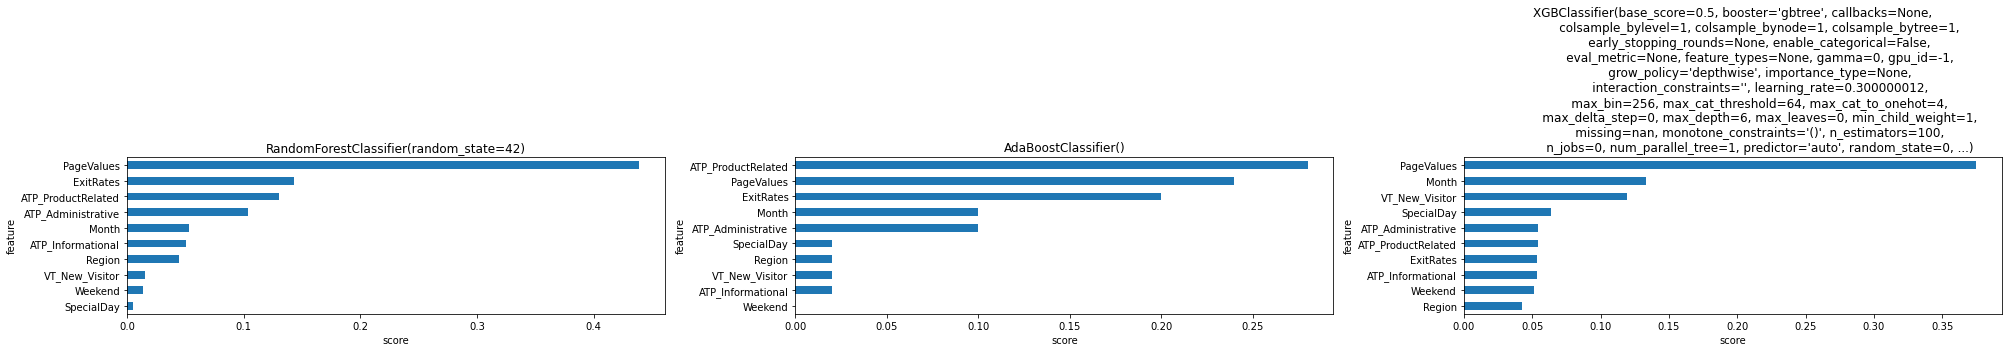

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

model = [rf, clf, xgb]
for i in range(0, len(model)):
  plt.subplot(1, 3, i+1)
  model[i].fit(X_train, y_train)
  show_feature_importance(model[i])
  plt.tight_layout()

Shap values

In [89]:
import shap

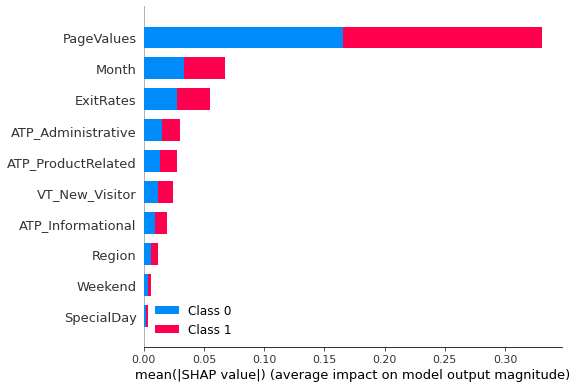

In [98]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

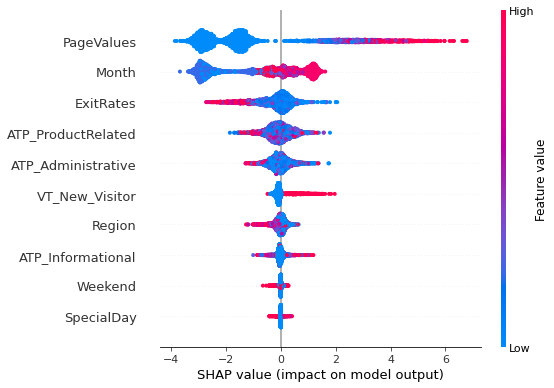

In [92]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Exact explainer: 1001it [00:16, 20.80it/s]                                                                             


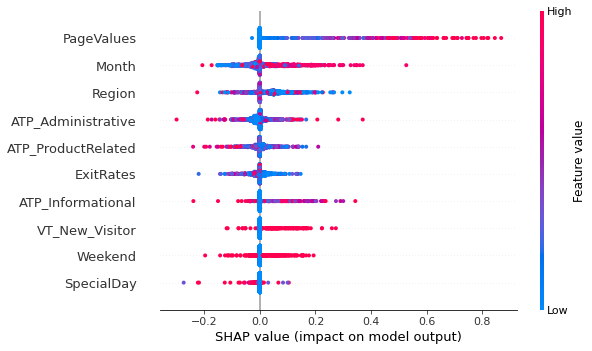

In [94]:
import shap
f = lambda x: knn.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_test.iloc[0:1000,:])
shap.plots.beeswarm(shap_values)

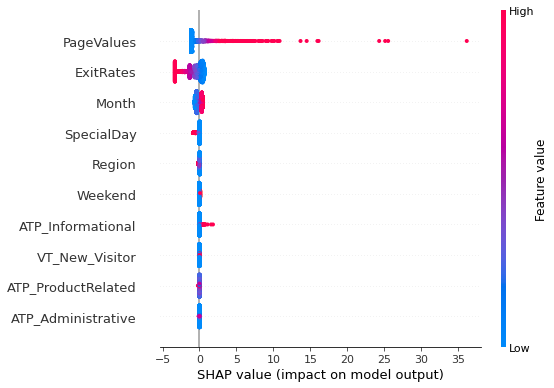

In [95]:
#shap feature importance
import shap

logreg = LogisticRegression() 
logreg.fit(X_over_smote, y_over_smote) 
explainer = shap.LinearExplainer(logreg, X_over_smote)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)